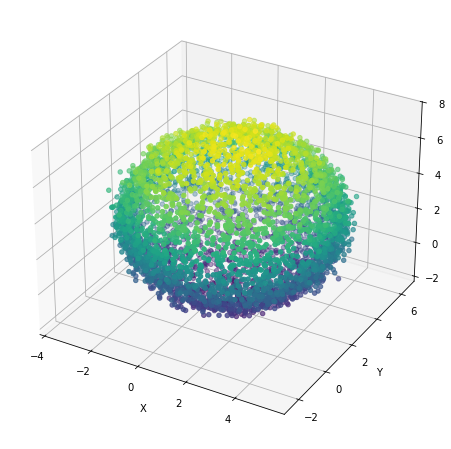

In [60]:
from matplotlib import pyplot as plt
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
df=pd.read_csv("spatial_data.csv")
x = df['x'].values
y = df['y'].values
z=df['z'].values


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [61]:
def mse_lossSquare(params,x,y,z): 
    h,k,l,R= params 
    noise = R-pow(((x-h)**2+(y-k)**2+(z-l)**2),0.5)
    mseSqr= noise**2
    return np.mean(mseSqr)



In [65]:
initial_guess = [0.01,0.01,0.01,0.01] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z)) 
h,k,l,R= result_mse.x 
print(h,k,l,R)


1.0023185480577694 1.9988668789790063 2.997632753877318 4.014288257983409


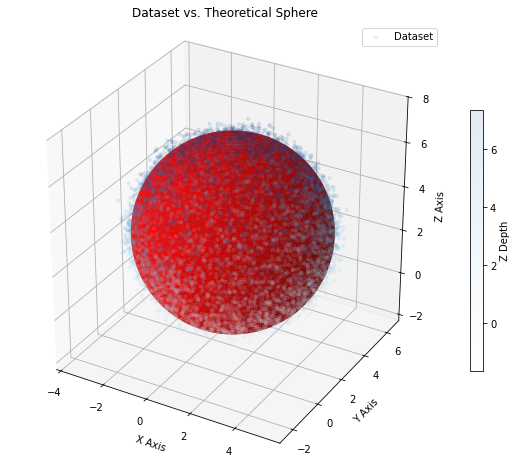

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET YOUR PARAMETERS ---
# R, h, k, l should be defined in your workspace
# Example: R = 5; h, k, l = 2, 3, 4 

# --- 2. GENERATE THE SPHERE SURFACE ---
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Parametric equations for the sphere
sphere_x = h + R * np.outer(np.cos(u), np.sin(v))
sphere_y = k + R * np.outer(np.sin(u), np.sin(v))
sphere_z = l + R * np.outer(np.ones(np.size(u)), np.cos(v))

# --- 3. CREATE THE FIGURE ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sphere Surface (Wireframe or Surface)
# 'alpha' makes it transparent so you can see the data points inside/behind it
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='RED', alpha=0.8, linewidth=0)

# Plot your Original Data Scatter Points
# 'c=df['z']' applies the viridis colormap based on depth
sc = ax.scatter(df['x'], df['y'], df['z'], c=df['z'],alpha=0.1, cmap='Blues', s=10, label='Dataset')

# --- 4. FORMATTING ---
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Dataset vs. Theoretical Sphere')

# CRITICAL: Forces the sphere to look round and not like an egg
ax.set_aspect('equal') 

# Add a colorbar for the data points
plt.colorbar(sc, ax=ax, label='Z Depth', shrink=0.6)
ax.legend()

plt.show()

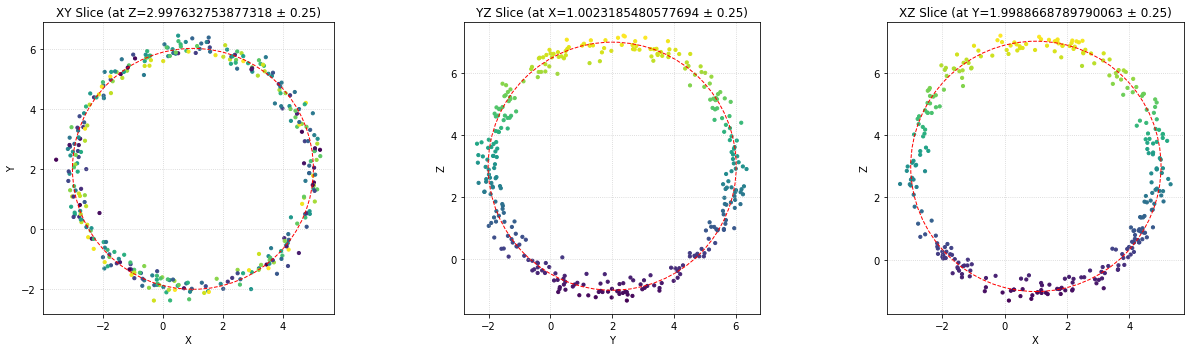

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET PARAMETERS ---
# R, h, k, l should be defined (e.g., R=5, h=2, k=3, l=4)
thickness = 0.5  # Adjust this to make the slice thinner or thicker

# --- 2. CREATE THE FIGURE ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax_xy, ax_yz, ax_xz = axes

# --- Subplot 1: XY Slice (at Z = l) ---
# Filter: Points where Z is within (l - thickness/2) and (l + thickness/2)
slice_xy = df[(df['z'] >= l - thickness/2) & (df['z'] <= l + thickness/2)]
ax_xy.scatter(slice_xy['x'], slice_xy['y'], c=slice_xy['z'], cmap='viridis', s=10)
circle_xy = plt.Circle((h, k), R, color='r', fill=False, linestyle='--', label='Sphere Cross-section')
ax_xy.add_patch(circle_xy)
ax_xy.set_title(f'XY Slice (at Z={l} ± {thickness/2})')
ax_xy.set_xlabel('X'); ax_xy.set_ylabel('Y')

# --- Subplot 2: YZ Slice (at X = h) ---
# Filter: Points where X is within (h - thickness/2) and (h + thickness/2)
slice_yz = df[(df['x'] >= h - thickness/2) & (df['x'] <= h + thickness/2)]
ax_yz.scatter(slice_yz['y'], slice_yz['z'], c=slice_yz['z'], cmap='viridis', s=10)
circle_yz = plt.Circle((k, l), R, color='r', fill=False, linestyle='--')
ax_yz.add_patch(circle_yz)
ax_yz.set_title(f'YZ Slice (at X={h} ± {thickness/2})')
ax_yz.set_xlabel('Y'); ax_yz.set_ylabel('Z')

# --- Subplot 3: XZ Slice (at Y = k) ---
# Filter: Points where Y is within (k - thickness/2) and (k + thickness/2)
slice_xz = df[(df['y'] >= k - thickness/2) & (df['y'] <= k + thickness/2)]
ax_xz.scatter(slice_xz['x'], slice_xz['z'], c=slice_xz['z'], cmap='viridis', s=10)
circle_xz = plt.Circle((h, l), R, color='r', fill=False, linestyle='--')
ax_xz.add_patch(circle_xz)
ax_xz.set_title(f'XZ Slice (at Y={k} ± {thickness/2})')
ax_xz.set_xlabel('X'); ax_xz.set_ylabel('Z')

# Formatting for all
for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

In [105]:
negative_octant_mask = (df['x'] < 0) | (df['y'] < 0) | (df['z'] < 0)

# 2. Filter the dataframe
# The ~ symbol (tilde) means "NOT", so we keep everything except that mask
df_filtered = df[~negative_octant_mask].copy()

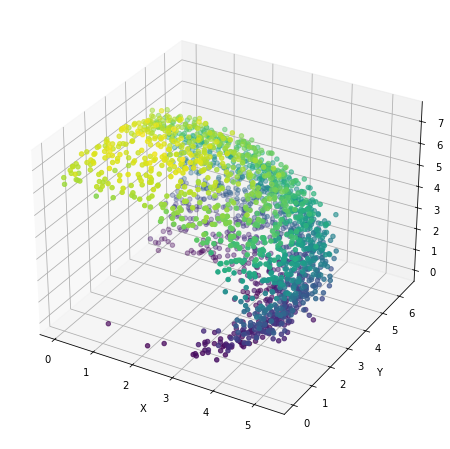

In [106]:
x = df_filtered['x'].values
y = df_filtered['y'].values
z=df_filtered['z'].values


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 4. Plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [107]:
def mse_lossSquare(params,x,y,z): 
    h,k,l,R= params 
    noise = R-pow(((x-h)**2+(y-k)**2+(z-l)**2),0.5)
    mseSqr= noise**2
    return np.mean(mseSqr)



In [108]:
initial_guess = [0.01,0.01,0.01,0.01] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z)) 
h,k,l,R= result_mse.x 
print(h,k,l,R)


1.043614971415541 2.0325646148053287 3.021446700954906 3.970833161760886


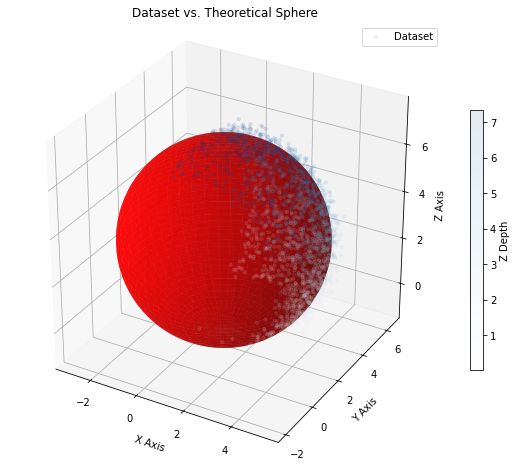

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET YOUR PARAMETERS ---
# R, h, k, l should be defined in your workspace
# Example: R = 5; h, k, l = 2, 3, 4 

# --- 2. GENERATE THE SPHERE SURFACE ---
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Parametric equations for the sphere
sphere_x = h + R * np.outer(np.cos(u), np.sin(v))
sphere_y = k + R * np.outer(np.sin(u), np.sin(v))
sphere_z = l + R * np.outer(np.ones(np.size(u)), np.cos(v))

# --- 3. CREATE THE FIGURE ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sphere Surface (Wireframe or Surface)
# 'alpha' makes it transparent so you can see the data points inside/behind it
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='RED', alpha=0.8, linewidth=0)

# Plot your Original Data Scatter Points
# 'c=df['z']' applies the viridis colormap based on depth
sc = ax.scatter(df_filtered['x'], df_filtered['y'], df_filtered['z'], c=df_filtered['z'],alpha=0.1, cmap='Blues', s=10, label='Dataset')

# --- 4. FORMATTING ---
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Dataset vs. Theoretical Sphere')

# CRITICAL: Forces the sphere to look round and not like an egg
ax.set_aspect('equal') 

# Add a colorbar for the data points
plt.colorbar(sc, ax=ax, label='Z Depth', shrink=0.6)
ax.legend()

plt.show()

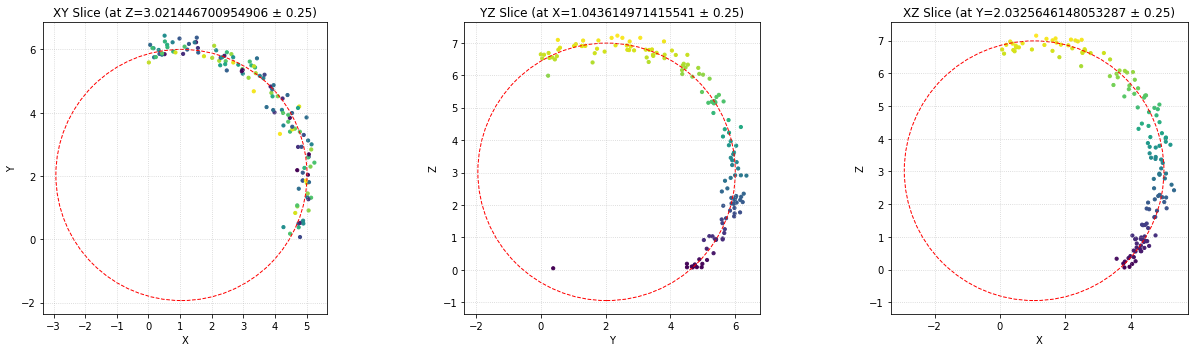

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET PARAMETERS ---
# R, h, k, l and df_filtered must be defined beforehand
thickness = 0.5 

# --- 2. CREATE THE FIGURE ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax_xy, ax_yz, ax_xz = axes

# --- Subplot 1: XY Slice (at Z = l) ---
# Using df_filtered instead of df
slice_xy = df_filtered[(df_filtered['z'] >= l - thickness/2) & (df_filtered['z'] <= l + thickness/2)]
ax_xy.scatter(slice_xy['x'], slice_xy['y'], c=slice_xy['z'], cmap='viridis', s=10)
circle_xy = plt.Circle((h, k), R, color='r', fill=False, linestyle='--', label='Sphere Cross-section')
ax_xy.add_patch(circle_xy)
ax_xy.set_title(f'XY Slice (at Z={l} ± {thickness/2})')
ax_xy.set_xlabel('X'); ax_xy.set_ylabel('Y')

# --- Subplot 2: YZ Slice (at X = h) ---
slice_yz = df_filtered[(df_filtered['x'] >= h - thickness/2) & (df_filtered['x'] <= h + thickness/2)]
ax_yz.scatter(slice_yz['y'], slice_yz['z'], c=slice_yz['z'], cmap='viridis', s=10)
circle_yz = plt.Circle((k, l), R, color='r', fill=False, linestyle='--')
ax_yz.add_patch(circle_yz)
ax_yz.set_title(f'YZ Slice (at X={h} ± {thickness/2})')
ax_yz.set_xlabel('Y'); ax_yz.set_ylabel('Z')

# --- Subplot 3: XZ Slice (at Y = k) ---
slice_xz = df_filtered[(df_filtered['y'] >= k - thickness/2) & (df_filtered['y'] <= k + thickness/2)]
ax_xz.scatter(slice_xz['x'], slice_xz['z'], c=slice_xz['z'], cmap='viridis', s=10)
circle_xz = plt.Circle((h, l), R, color='r', fill=False, linestyle='--')
ax_xz.add_patch(circle_xz)
ax_xz.set_title(f'XZ Slice (at Y={k} ± {thickness/2})')
ax_xz.set_xlabel('X'); ax_xz.set_ylabel('Z')

# Formatting for all
for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

1. Part D

In [128]:
def mse_lossSquare(params,x,y,z): 
    h,k,l,R= params 
    noise = R-pow(((x-h)**2+(y-k)**2+(z-l)**2),0.5)
    delta=1
    L = list(range(len(noise)))
    mseSqr = list(np.zeros(len(noise)))
    for i in L:
        mseSqr[i]= 0.5*noise[i]**2 if abs(noise[i])<=delta else delta*(abs(noise[i])-0.5*delta)
    return np.mean(mseSqr)



In [129]:
initial_guess = [0.01,0.01,0.01,0.01] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z)) 
h,k,l,R= result_mse.x 
print(h,k,l,R)


1.0434893950444264 2.0324529232116295 3.0213925130503 3.970945174678715


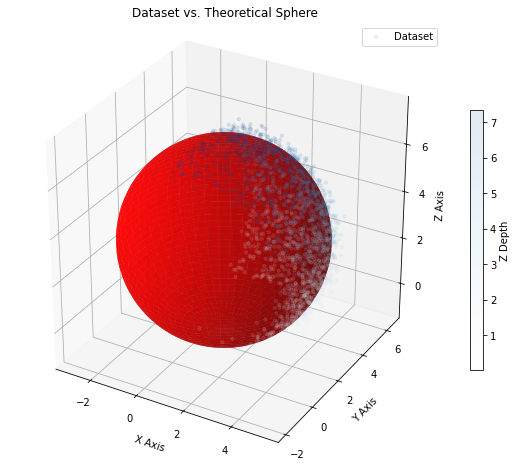

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET YOUR PARAMETERS ---
# R, h, k, l should be defined in your workspace
# Example: R = 5; h, k, l = 2, 3, 4 

# --- 2. GENERATE THE SPHERE SURFACE ---
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Parametric equations for the sphere
sphere_x = h + R * np.outer(np.cos(u), np.sin(v))
sphere_y = k + R * np.outer(np.sin(u), np.sin(v))
sphere_z = l + R * np.outer(np.ones(np.size(u)), np.cos(v))

# --- 3. CREATE THE FIGURE ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sphere Surface (Wireframe or Surface)
# 'alpha' makes it transparent so you can see the data points inside/behind it
ax.plot_surface(sphere_x, sphere_y, sphere_z, color='RED', alpha=0.8, linewidth=0)

# Plot your Original Data Scatter Points
# 'c=df['z']' applies the viridis colormap based on depth
sc = ax.scatter(df_filtered['x'], df_filtered['y'], df_filtered['z'], c=df_filtered['z'],alpha=0.1, cmap='Blues', s=10, label='Dataset')

# --- 4. FORMATTING ---
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('Dataset vs. Theoretical Sphere')

# CRITICAL: Forces the sphere to look round and not like an egg
ax.set_aspect('equal') 

# Add a colorbar for the data points
plt.colorbar(sc, ax=ax, label='Z Depth', shrink=0.6)
ax.legend()

plt.show()

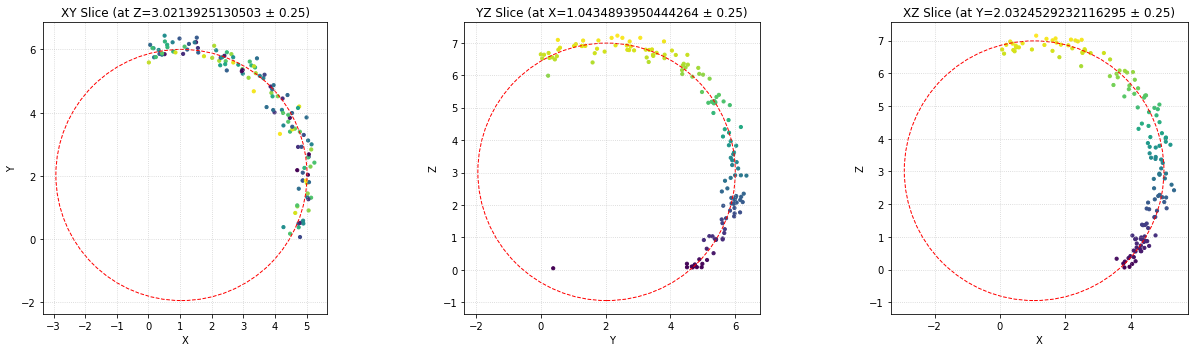

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. SET PARAMETERS ---
# R, h, k, l and df_filtered must be defined beforehand
thickness = 0.5 

# --- 2. CREATE THE FIGURE ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
ax_xy, ax_yz, ax_xz = axes

# --- Subplot 1: XY Slice (at Z = l) ---
# Using df_filtered instead of df
slice_xy = df_filtered[(df_filtered['z'] >= l - thickness/2) & (df_filtered['z'] <= l + thickness/2)]
ax_xy.scatter(slice_xy['x'], slice_xy['y'], c=slice_xy['z'], cmap='viridis', s=10)
circle_xy = plt.Circle((h, k), R, color='r', fill=False, linestyle='--', label='Sphere Cross-section')
ax_xy.add_patch(circle_xy)
ax_xy.set_title(f'XY Slice (at Z={l} ± {thickness/2})')
ax_xy.set_xlabel('X'); ax_xy.set_ylabel('Y')

# --- Subplot 2: YZ Slice (at X = h) ---
slice_yz = df_filtered[(df_filtered['x'] >= h - thickness/2) & (df_filtered['x'] <= h + thickness/2)]
ax_yz.scatter(slice_yz['y'], slice_yz['z'], c=slice_yz['z'], cmap='viridis', s=10)
circle_yz = plt.Circle((k, l), R, color='r', fill=False, linestyle='--')
ax_yz.add_patch(circle_yz)
ax_yz.set_title(f'YZ Slice (at X={h} ± {thickness/2})')
ax_yz.set_xlabel('Y'); ax_yz.set_ylabel('Z')

# --- Subplot 3: XZ Slice (at Y = k) ---
slice_xz = df_filtered[(df_filtered['y'] >= k - thickness/2) & (df_filtered['y'] <= k + thickness/2)]
ax_xz.scatter(slice_xz['x'], slice_xz['z'], c=slice_xz['z'], cmap='viridis', s=10)
circle_xz = plt.Circle((h, l), R, color='r', fill=False, linestyle='--')
ax_xz.add_patch(circle_xz)
ax_xz.set_title(f'XZ Slice (at Y={k} ± {thickness/2})')
ax_xz.set_xlabel('X'); ax_xz.set_ylabel('Z')

# Formatting for all
for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

1. Tuning Hyperparameters

In [133]:
def mse_lossSquare(params,x,y,z,delta): 
    h,k,l,R= params 
    noise = R-pow(((x-h)**2+(y-k)**2+(z-l)**2),0.5)
    L = list(range(len(noise)))
    mseSqr = list(np.zeros(len(noise)))
    for i in L:
        mseSqr[i]= 0.5*noise[i]**2 if abs(noise[i])<=delta else delta*(abs(noise[i])-0.5*delta)
    return np.mean(mseSqr)

M=[0,0.01,0.050,0.1,0.5,1,1.5,2,2.5,10,50,100]
for i in M:
    initial_guess = [0.01,0.01,0.01,0.01] 
    result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z,i)) 
    h,k,l,R= result_mse.x 
    print(h,k,l,R)


0.01 0.01 0.01 0.01
1.0356324526596128 2.021813162243886 3.017427380970909 3.9762064324100366
1.0343721685376117 2.0202775279348213 3.0185387793770047 3.9791276201919374
1.0384387124485777 2.025338797364954 3.0205693989649665 3.976033787513266
1.0423499697819618 2.0319377681292607 3.021988293665199 3.9715119526182634
1.0434893950444264 2.0324529232116295 3.0213925130503 3.970945174678715
1.0436132006010264 2.032558476203933 3.0214487086041606 3.9708361284796667
1.04361024727974 2.032554257310522 3.021448759943615 3.970839372013048
1.0435495073488956 2.0325050415069006 3.0214207922789416 3.9708950084157038
1.0436104351950826 2.0325442820989323 3.0214510898148683 3.9708385546418716
1.0436104351950826 2.0325442820989323 3.0214510898148683 3.9708385546418716
1.0436104351950826 2.0325442820989323 3.0214510898148683 3.9708385546418716


In [136]:
M = np.linspace(0.01,0.1,100)
R_min = 0
delta_min = 0

for i in M:
    initial_guess = [0.01,0.01,0.01,0.01] 
    result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z,i)) 
    h,k,l,R= result_mse.x
    if(abs(R-4)<abs(R_min-4)):
        R_min = R 
        delta_min = i
        print("minimum error is using delta = ",i,"and the value of R=",R)


minimum error is using delta =  0.01 and the value of R= 3.9762064324100366
minimum error is using delta =  0.01090909090909091 and the value of R= 3.976435183890598
minimum error is using delta =  0.011818181818181818 and the value of R= 3.9772459485351983
minimum error is using delta =  0.012727272727272728 and the value of R= 3.9772770793132137
minimum error is using delta =  0.013636363636363637 and the value of R= 3.977298409346929
minimum error is using delta =  0.016363636363636365 and the value of R= 3.977324539250979
minimum error is using delta =  0.017272727272727273 and the value of R= 3.9784887759481795
minimum error is using delta =  0.02909090909090909 and the value of R= 3.978871778986492
minimum error is using delta =  0.030000000000000006 and the value of R= 3.9790898125974308
minimum error is using delta =  0.04363636363636364 and the value of R= 3.9790991731982204
minimum error is using delta =  0.044545454545454555 and the value of R= 3.9792299543008087


In [139]:
M = np.linspace(0.045,0.048,100)
R_min = 0
delta_min = 0

for i in M:
    initial_guess = [0.01,0.01,0.01,0.01] 
    result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z,i)) 
    h,k,l,R= result_mse.x
    if(abs(R-4)<abs(R_min-4)):
        R_min = R 
        delta_min = i
        print("minimum error is using delta = ",i,"and the value of R=",R)

minimum error is using delta =  0.045 and the value of R= 3.9789146442394405
minimum error is using delta =  0.04506060606060606 and the value of R= 3.9790538708155254
minimum error is using delta =  0.04509090909090909 and the value of R= 3.979228898863518
minimum error is using delta =  0.04521212121212121 and the value of R= 3.979244901972705
minimum error is using delta =  0.04536363636363636 and the value of R= 3.9792619788637276
minimum error is using delta =  0.045575757575757575 and the value of R= 3.9793720266377255
minimum error is using delta =  0.04587878787878788 and the value of R= 3.979385620748774
minimum error is using delta =  0.04593939393939394 and the value of R= 3.9794440380133524


In [140]:
M = np.linspace(0.0457,0.046,100)
R_min = 0
delta_min = 0

for i in M:
    initial_guess = [0.01,0.01,0.01,0.01] 
    result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z,i)) 
    h,k,l,R= result_mse.x
    if(abs(R-4)<abs(R_min-4)):
        R_min = R 
        delta_min = i
        print("minimum error is using delta = ",i,"and the value of R=",R)

minimum error is using delta =  0.0457 and the value of R= 3.978981652620341
minimum error is using delta =  0.0457030303030303 and the value of R= 3.979519967363917
minimum error is using delta =  0.045706060606060604 and the value of R= 3.9795611058649403
minimum error is using delta =  0.04570909090909091 and the value of R= 3.9795773176564313


In [142]:
M = np.linspace(0.045706,0.045720,100)
R_min = 0
delta_min = 0

for i in M:
    initial_guess = [0.01,0.01,0.01,0.01] 
    result_mse = minimize(mse_lossSquare, initial_guess, args=(x,y,z,i)) 
    h,k,l,R= result_mse.x
    if(abs(R-4)<abs(R_min-4)):
        R_min = R 
        delta_min = i
        print("minimum error is using delta = ",i,"and the value of R=",R)

minimum error is using delta =  0.045706 and the value of R= 3.97956071998112
minimum error is using delta =  0.04570614141414141 and the value of R= 3.979561720222354
minimum error is using delta =  0.045706282828282825 and the value of R= 3.9795627894887273
minimum error is using delta =  0.045706424242424236 and the value of R= 3.979563542157559
minimum error is using delta =  0.045706565656565654 and the value of R= 3.979564401678035
minimum error is using delta =  0.045706707070707064 and the value of R= 3.979565398933249
minimum error is using delta =  0.04570684848484848 and the value of R= 3.979566293926782
minimum error is using delta =  0.04570698989898989 and the value of R= 3.9795671678015356
minimum error is using delta =  0.04570713131313131 and the value of R= 3.979568340595052
minimum error is using delta =  0.04570727272727272 and the value of R= 3.9795694272407682
minimum error is using delta =  0.04570741414141414 and the value of R= 3.97957047044026
minimum error is